### Part 2: Obspy

In Python thousands of functions are available, so you don't have to program everything from scratch! Beside some standard functions, they are organized in different modules which you have to load before you can use them. <br>
One of such modules is the 'obspy'-module, which is very helpful for seismological analysis.
see more details in https://docs.obspy.org/ and https://seismo-live.github.io/tree/index.html

In [1]:
import obspy

The obspy package provides a function to read seismic data (mseed, sac,...) easily. We also have to import this function to use it:

In [2]:
from obspy import read

After importing the function we can read the data with the command <code>read("path to filename")</code> and assign it to a variable. In the following example we read the mseed-file, which is located in the folder "Files". Check the data type of the variable with <code>print(type(variable))</code>. What kind of object is it?

In [5]:
st=read('Files/GR.BFO..BH?.D.2019.308')
#print datatype with print(type(...))
print(type(st))

<class 'obspy.core.stream.Stream'>


You realized that the obspy object, which is returned by the function <code>read</code> is not one of the "common" python data types. The data in obspy is structured in streams and traces.
<img src="Files/obspy_stream.png" alt="drawing" width="550"> <br>
A trace contains the seismic data and the meta data of one single channel (e.g. 1 component of a specific station). A stream is something like a container for one or multiple traces. To check how many traces are contained in the stream <code>st</code>, we us a command which you already know from determining the lenght of strings and lists: <code>len()</code> <br>
If a stream contains multiple traces, than each trace has an index corresponding to its position (e.g. first trace is <code>st[0]</code>). <br> 
How many traces does the stream contain, which we read in the cell above? Assign the first trace to a new variable <code>tr</code>.

In [6]:
#How many traces does the stream st contain? Use: print(len())
print(len(st))
#assign the first trace to the variable tr
tr=st[0]

3


A trace does not only contain the seismic data, but also additional information about the station, component, and the recording time.
<img src="Files/obspy_trace_props.png" alt="drawing" width="550"> <br>
As illustrated in the Figure, the trace contains two different objects, which are some kind of container. In the container "data" the seismic data is located as a 1D-array of floats. The other container "stats" consists out of multiple more objects, e.g. station (string with station name) or sampling_rate (float defining the sampling rate of the recording). <br>
To get the relevant information, first the trace has to be specified and then the container in which the information is located:<br>
E.g. <code>st[0].stats.channel</code> returns the channel (component) of the first trace in the stream <code>st</code> or
<code>st[0].data</code> returns the seismic data.<br>
<br>
Print the station, channel and starttime of the first trace in <code>st</code>! Try to print the first data point of the seismic data in the first trace as well. Then, check the remaining traces (station, component,...).

In [9]:
#print station
print(tr.stats.station)
#print channel
print(tr.stats.channel)
#print starttime
print(tr.stats.starttime)
#print first data point
print(tr.data[0])

BFO
BHE
2019-11-04T00:00:17.869538Z
656


Obspy provides a simple fuction to plot the data, which is contained in traces and streams: <br>
<code>stream.plot()</code> <br>
<br>
Use this function to plot the data of the whole stream! 

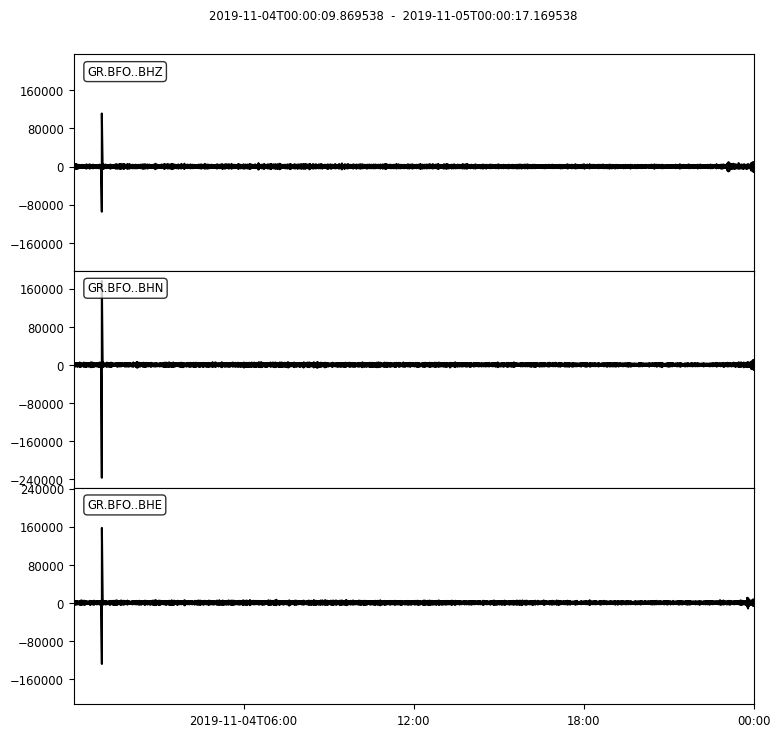

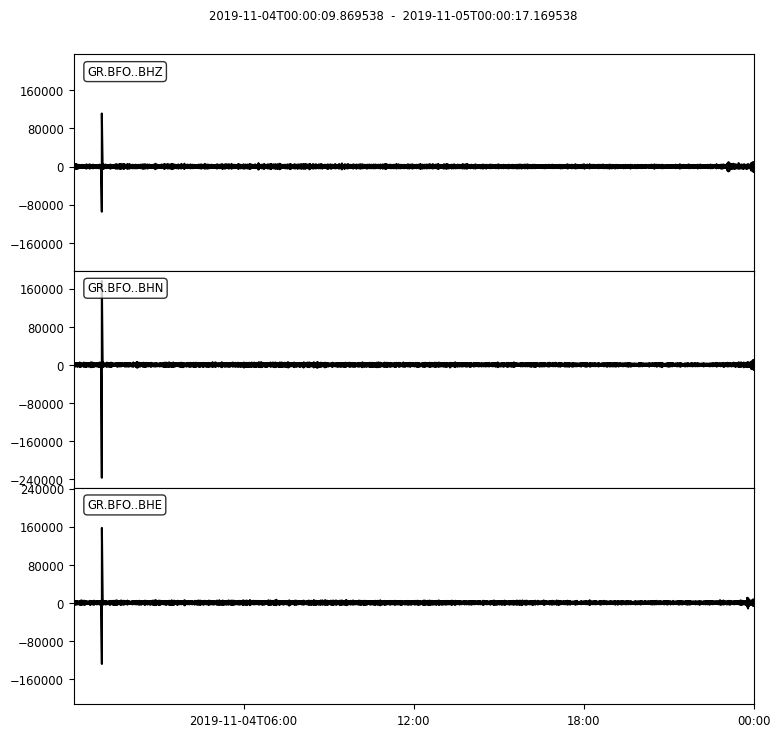

In [13]:
# plot the data of the stream!
st.plot()

Often you are only intersted in a specific part of the data and therefore we want to cut the trace. Again, there is a predefined function we can use:<br>
<code>stream/trace.trim('starttime', 'endtime')</code> <br>
This function works for streams as well as for traces and requires two arguments: the start- and the endtime of the slice you want to cut.



In order to define the two time parameters, we have to import a further obspy package: <code>UTCDateTime</code>

In [14]:
from obspy import UTCDateTime

The following example shows, how a specific date and time is defined. <br>
For a detailed explanation about different posibilities to use this package, have a look at: <br>
https://docs.obspy.org/packages/autogen/obspy.core.utcdatetime.UTCDateTime.html

In [15]:
t1=UTCDateTime(2019,11,4,0,58,0) #in the brackets are defined: year, month, day, hour, minute, second
print(t1)

2019-11-04T00:58:00.000000Z


Now, cut a slice with a duration of 1h and plot the result!


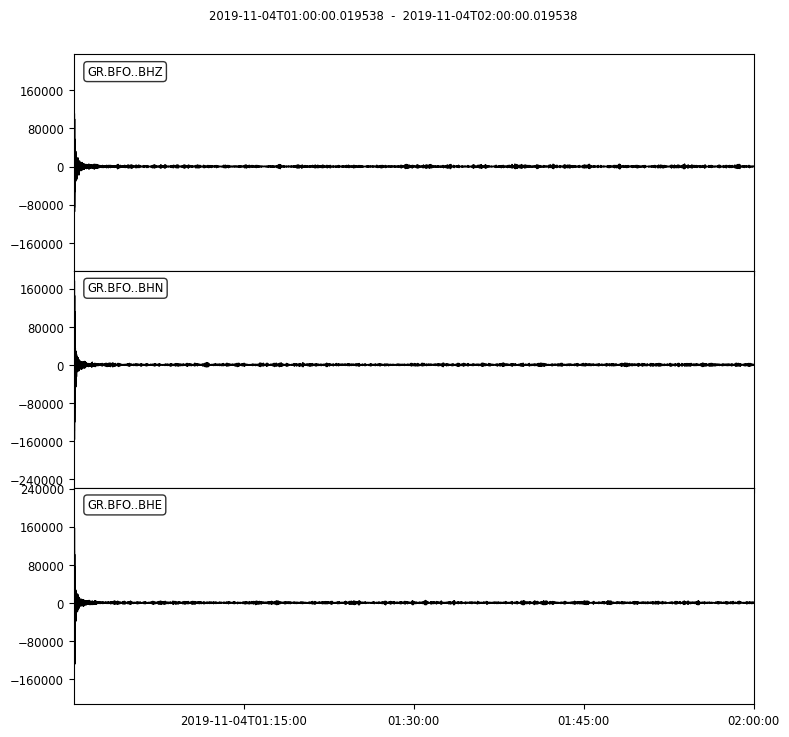

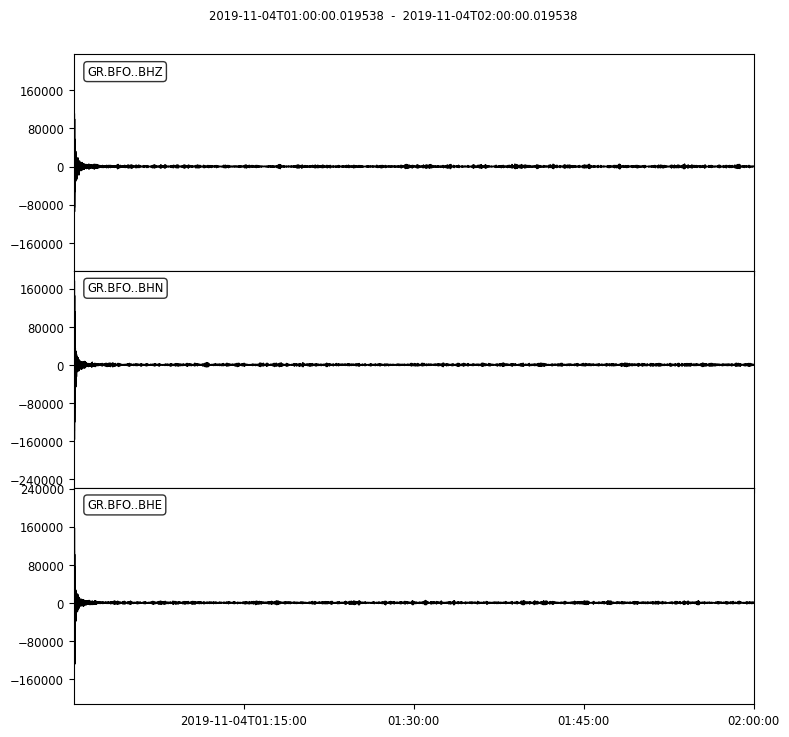

In [16]:
#define start
starttime=UTCDateTime(2019,11,4,1,0,0)
#define end
endtime=UTCDateTime(2019,11,4,2,0,0)
#use trim() to cut the stream st 
st.trim(starttime, endtime)
#plot the stream
st.plot()

Try to cut a new time window of a different hour of the day and plot it. Does it work? If not, what could be the reason? <br>
Hint: Print the starttime and endtime of the trace and compare it with the start and end of the slice you want to cut.

In [26]:
##reason is that you have stored the trimed data into the original stream or trace
## so you have to reload the data and try to store the stream into a new one
st=read('Files/GR.BFO..BH?.D.2019.308')
st2=st.copy()
st2=st2.trim(starttime, endtime)

In [27]:
st

3 Trace(s) in Stream:
GR.BFO..BHE | 2019-11-04T00:00:17.869538Z - 2019-11-05T00:00:10.969538Z | 20.0 Hz, 1727863 samples
GR.BFO..BHN | 2019-11-04T00:00:11.419538Z - 2019-11-05T00:00:11.169538Z | 20.0 Hz, 1727996 samples
GR.BFO..BHZ | 2019-11-04T00:00:09.869538Z - 2019-11-05T00:00:17.169538Z | 20.0 Hz, 1728147 samples

In [28]:
st2

3 Trace(s) in Stream:
GR.BFO..BHE | 2019-11-04T01:00:00.019538Z - 2019-11-04T02:00:00.019538Z | 20.0 Hz, 72001 samples
GR.BFO..BHN | 2019-11-04T01:00:00.019538Z - 2019-11-04T02:00:00.019538Z | 20.0 Hz, 72001 samples
GR.BFO..BHZ | 2019-11-04T01:00:00.019538Z - 2019-11-04T02:00:00.019538Z | 20.0 Hz, 72001 samples

You might have realized that ```trim()``` deletes all data outside of the slice! So if we want to cut a new time window, we have to read the data again. <br>
Check the data in the time window between 00:58 - 01:02 on then 4.11.2019. What kind of signal do you see?

In [29]:
#read data to a obspy stream (you can copy it from above)

#define start and end time

#trim the stream

#plot the new slice
starttime=UTCDateTime(2019,11,4,0,58,0)
#define end
endtime=UTCDateTime(2019,11,4,1,2,0)
st=read('Files/GR.BFO..BH?.D.2019.308')
st2=st.copy()
st2=st2.trim(starttime, endtime)

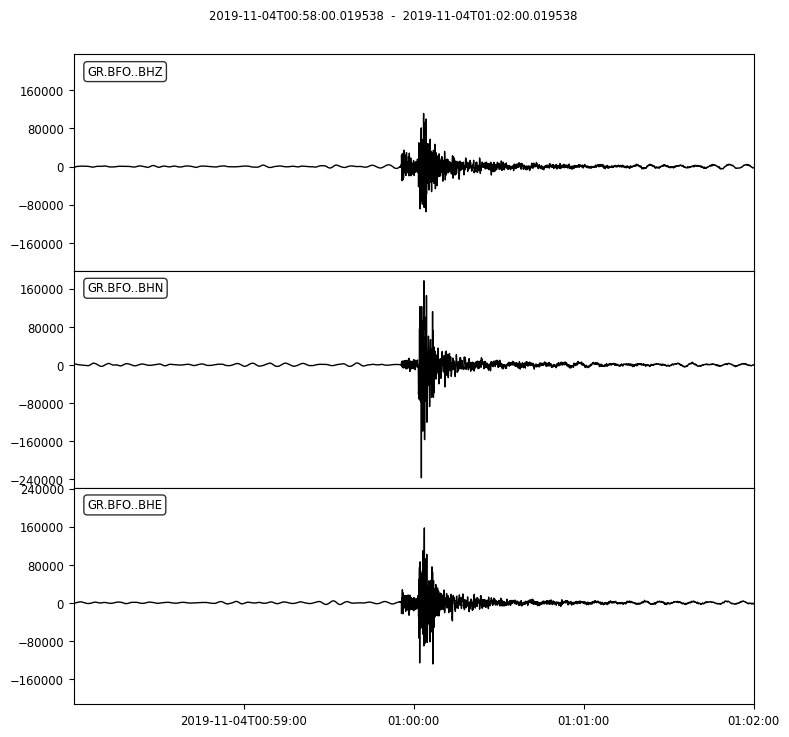

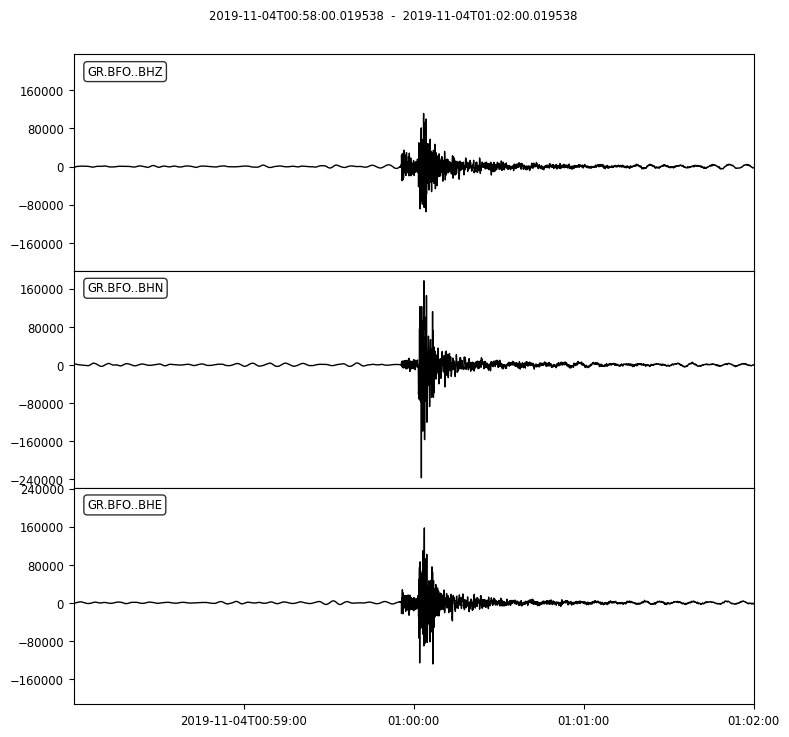

In [31]:
st2.plot()